In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py, copy
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *

from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

## choose file either with the run number (first cell) or widget (second cell)

In [17]:
pgroup='p20572'
runnumber = 306
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
jsonfile

run: 0306


'/sf/alvra/data/p20572/raw/run0306-MB_EtOH_10mM_XAS_-10ns/meta/scan.json'

In [18]:
#fc = FileChooser('/sf/alvra/data/p19636/raw')  #this is for RC
#fc.use_dir_icons = True

#display(fc)

In [19]:
#jsonfile = copy.copy(fc.selected)
#jsonfile

In [20]:
quantile_corr = 0.5

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

reducedir='../Claudio/Reduced_XANES/'

#######################################################################################################33
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

(DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1,
 Izero_pump_scan, Izero_unpump_scan, correlation, Energy_eV, goodshots1) = \
XAS_scan_1diode(scan, detector_XAS, detector_Izero, quantile_corr)

run_name = jsonfile.split('/')[-3]
os.makedirs(reducedir+run_name, exist_ok=True)

save_data_XANES(reducedir, run_name, Energy_eV, 
                DataDiode1_pump-np.mean(DataDiode1_pump[:5]), DataDiode1_unpump-np.mean(DataDiode1_pump[:5]), Pump_probe_Diode1, goodshots1)

#save_data_XANES(reducedir, run_name, Energy_eV, 
#                DataDiode1_pump-4, DataDiode1_unpump-4, Pump_probe_Diode1, goodshots1)



Processing: run0306-MB_EtOH_10mM_XAS_-10ns
Step 77 of 77: Processing acq0077

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 3 / 3 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 499 pump and 499 unpump shots
(130,) shots out of (499,) survived
Step 77 of 77: Processed acq0077
correlation Diode (all shots) = 0.9726359577959786


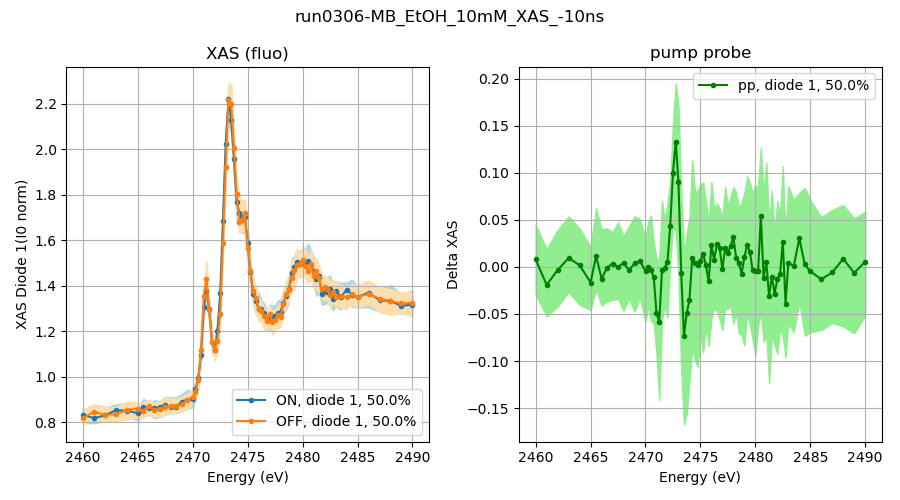

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(jsonfile.split('/')[-3], fontsize = 12)

XAS_pump = DataDiode1_pump[:,0]
err_low_pump = DataDiode1_pump[:,1]
err_high_pump = DataDiode1_pump[:,2]
XAS_unpump = DataDiode1_unpump[:,0]
err_low_unpump = DataDiode1_unpump[:,1]
err_high_unpump = DataDiode1_unpump[:,2]
XAS_pump_probe = Pump_probe_Diode1[:,0]
err_low_pump_probe = Pump_probe_Diode1[:,1]
err_high_pump_probe = Pump_probe_Diode1[:,2]

ax1.plot(Energy_eV, XAS_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_pump, err_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_unpump, err_high_unpump, color='navajowhite')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1(I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax2.plot(Energy_eV, XAS_pump_probe, label='pp, diode 1, {}%'.format(quantile_corr*100),marker='.', color = 'g')
ax2.fill_between(Energy_eV, err_low_pump_probe, err_high_pump_probe, color='lightgreen')

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("Delta XAS")
ax2.set_title('pump probe')
ax2.legend(loc="best")
ax2.grid()

plt.tight_layout()
plt.show()

## Error Bars

In [166]:
#### CH1 ####
XAS1_pump      = DataDiode1_pump[:,0]
err1_low_pump  = (DataDiode1_pump[:,1]-DataDiode1_pump[:,0])/np.sqrt(goodshots1)
err1_high_pump = (DataDiode1_pump[:,2]-DataDiode1_pump[:,0])/np.sqrt(goodshots1)

XAS1_unpump      = DataDiode1_unpump[:,0]
err1_low_unpump  = (DataDiode1_unpump[:,1]-DataDiode1_unpump[:,0])/np.sqrt(goodshots1)
err1_high_unpump = (DataDiode1_unpump[:,2]-DataDiode1_unpump[:,0])/np.sqrt(goodshots1)

XAS1_pump_probe       = Pump_probe_Diode1[:,0]
err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)

## Plotting XANES with error bars

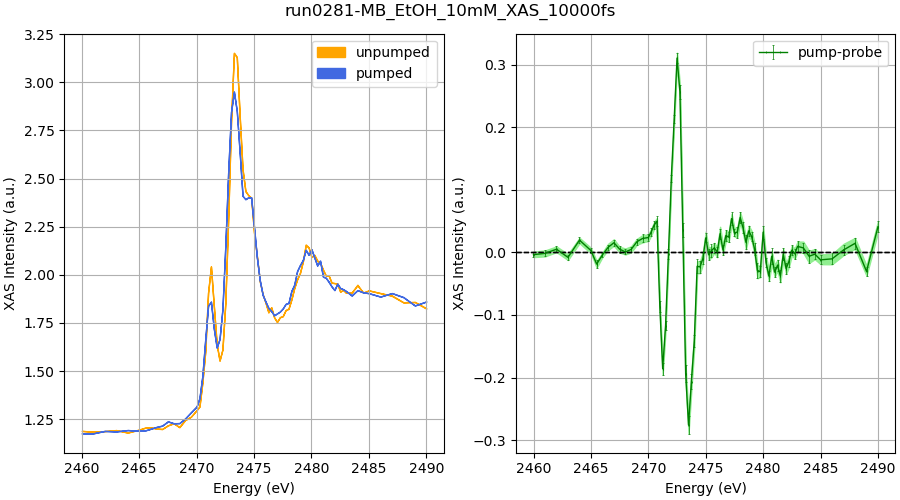

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(jsonfile.split('/')[-3], fontsize = 12)

#ax1.plot(Energy_eV,XAS1_pump,lw=1,marker='o',markersize=3,label='unpumped')
ax1.fill_between(Energy_eV,XAS1_unpump-err1_low_unpump, XAS1_unpump+err1_high_unpump,color='orange',label='unpumped')
ax1.fill_between(Energy_eV,XAS1_pump-err1_low_pump, XAS1_pump+err1_high_pump,color='royalblue',label='pumped')


ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS Intensity (a.u.)')
ax1.legend()
ax1.grid()
#ax1.set_xlim(7110,7150)

## Difference of the Averages (probably more correct)
ax2.axes.errorbar(Energy_eV, XAS1_pump_probe, err1_low_pump_probe, err1_high_pump_probe, 
              lw=1,color='green', markersize=0,capsize=1,capthick=0.5,
                   ecolor='green',elinewidth=0.5,label='pump-probe')
#ax2.plot(Energy_eV,ave_pp1,lw=1,marker='o',markersize=3,color='green',label='unpumped')
ax2.fill_between(Energy_eV,XAS1_pump_probe-err1_low_pump_probe, XAS1_pump_probe+err1_high_pump_probe,color='lightgreen')


ax2.axhline(0,ls='--',c='k',lw=1)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('XAS Intensity (a.u.)')
ax2.legend()
ax2.grid()

ax2.axhline(0,ls='--',c='k',lw=1)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('XAS Intensity (a.u.)')
ax2.legend()
#ax2.set_ylim(-0.03,0.1)

## Check correlation for a certain energy point

In [168]:
chosen_energy = 2473.5

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

quantile_corr = 0.6
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(183,) shots out of (496,) survived
Energy = 2473.5021879672427 eV


(183,) shots out of (496,) survived


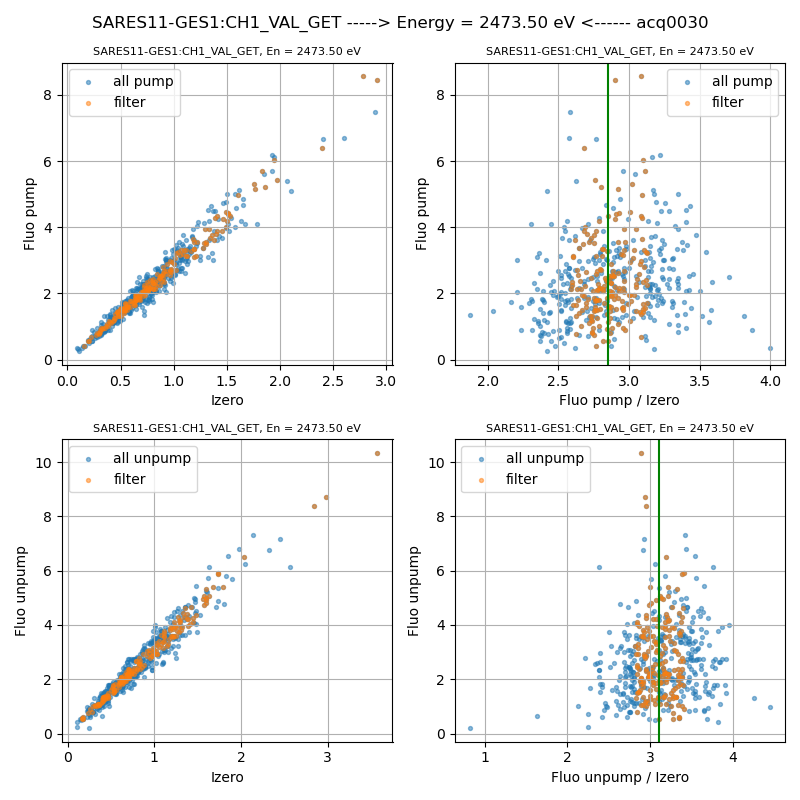

In [169]:
chosen_energy = 2473.5

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

quantile_corr = 0.6
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

fig,ax = plt.subplots(2,2,figsize=(8,8))
plt.suptitle('{} -----> Energy = {:.2f} eV <------ {}'.format(detector_XAS,Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))


ax[0][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all pump')
ax[0][0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][0].legend(loc='best')
ax[0][0].set_xlabel('Izero')
ax[0][0].set_ylabel('Fluo pump')
ax[0][0].grid()

m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)

ax[0][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][1].scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all pump')
ax[0][1].scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][1].legend(loc='best')
ax[0][1].set_xlabel('Fluo pump / Izero')
ax[0][1].set_ylabel('Fluo pump')
ax[0][1].axvline(x=m_median_filter, color = 'green')
ax[0][1].grid()

ax[1][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][0].scatter(Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all unpump')
ax[1][0].scatter(Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
ax[1][0].legend(loc='best')
ax[1][0].set_xlabel('Izero')
ax[1][0].set_ylabel('Fluo unpump')
ax[1][0].grid()

m_median_filter = np.median(Fluo_unpump_filter/Izero_unpump_filter)

ax[1][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][1].scatter(Fluo_unpump/Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all unpump')
ax[1][1].scatter(Fluo_unpump_filter/Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
ax[1][1].legend(loc='best')
ax[1][1].set_xlabel('Fluo unpump / Izero')
ax[1][1].set_ylabel('Fluo unpump')
ax[1][1].axvline(x=m_median_filter, color = 'green')
ax[1][1].grid()


plt.tight_layout()

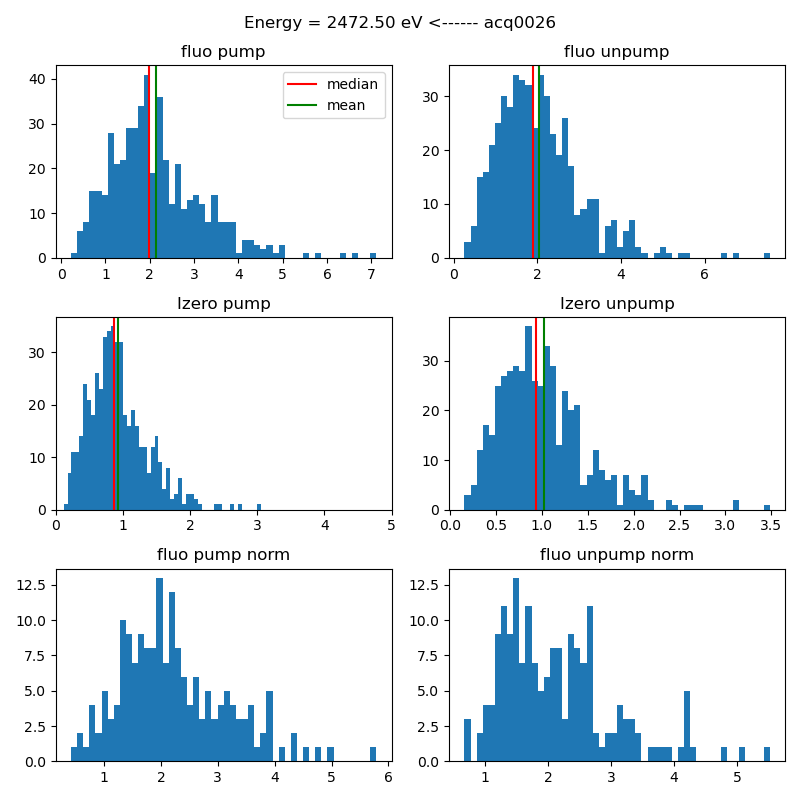

In [13]:
plt.figure(figsize=(8,8))
plt.suptitle('Energy = {:.2f} eV <------ {}'.format(Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))

plt.subplot(321)
plt.title('fluo pump')
plt.hist(Fluo_pump, bins = 50)
plt.axvline(x=np.median(Fluo_pump), color ='r',label='median')
plt.axvline(x=np.mean(Fluo_pump), color ='g', label = 'mean')
plt.legend(loc='best')

plt.subplot(322)
plt.title('fluo unpump')
plt.hist(Fluo_unpump, bins = 50)
plt.axvline(x=np.median(Fluo_unpump), color ='r')
plt.axvline(x=np.mean(Fluo_unpump), color ='g')

plt.subplot(323)
plt.title('Izero pump')
plt.hist(Izero_pump, bins = 50)
plt.axvline(x=np.median(Izero_pump), color ='r')
plt.axvline(x=np.mean(Izero_pump), color ='g')
plt.xlim(0,5)

plt.subplot(324)
plt.title('Izero unpump')
plt.hist(Izero_unpump, bins = 50)
plt.axvline(x=np.median(Izero_unpump), color ='r')
plt.axvline(x=np.mean(Izero_unpump), color ='g')

plt.subplot(325)
plt.title('fluo pump norm')
plt.hist(Fluo_pump_filter, bins = 50)
#plt.axvline(x=qnt_low_pump, color = 'black')
#plt.axvline(x=qnt_high_pump, color = 'black')
#plt.xlim(0,10)

plt.subplot(326)
plt.title('fluo unpump norm')
plt.hist(Fluo_unpump_filter, bins = 50)
#plt.axvline(x=qnt_low_pump, color = 'black')
#plt.axvline(x=qnt_high_pump, color = 'black')
#plt.xlim(0,10)


plt.tight_layout()
plt.show()

## Load files in a loop

In [16]:
pgroup='p20269'

#runlist = []
runlist = np.arange(157, 160, 1)

print ('{} runs: {}'.format(len(runlist),runlist))

#############################################################
from itertools import chain
jsonlist = []
for run in runlist:
    file = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))
    jsonlist.append(file)
jsonlist = itertools.chain.from_iterable(jsonlist)
jsonlist = sorted(jsonlist, key = os.path.getmtime)
jsonlist

3 runs: [157 158 159]


['/sf/alvra/data/p20269/raw/run0157-PtStolS_energy_scan_2460-2500_4uJ_10ps/meta/scan.json',
 '/sf/alvra/data/p20269/raw/run0158-PtStolS_energy_scan_2460-2500_4uJ_1ps/meta/scan.json',
 '/sf/alvra/data/p20269/raw/run0159-PtStolS_time_scan_2468p5_4uJ/meta/scan.json']

In [18]:
quantile_corr = 0.4

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

reducedir='../Claudio/Reduced_XANES_test/'

#######################################################################################################33
from sfdata import SFScanInfo

DataDiode1_pump_all = []
DataDiode1_unpump_all = []
Pump_probe1_all = []

for json_file in jsonlist:
    scan = SFScanInfo(json_file)
    scan = remove_JF_from_scan(scan)
    # Energy_eV = scan.readbacks
    
    DataDiode1_pump = []
    DataDiode1_unpump = []
    Pump_probe_Diode1 = []
    
    (DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, _, _, _, 
     Energy_eV, goodshots1) =  XAS_scan_1diode(scan, detector_XAS, detector_Izero, quantile_corr)      
        
    DataDiode1_pump_all.append(DataDiode1_pump)
    DataDiode1_unpump_all.append(DataDiode1_unpump)
    Pump_probe1_all.append(Pump_probe_Diode1)    
    
    run_name = json_file.split('/')[-3]
    os.makedirs(reducedir+run_name, exist_ok=True)

    save_data_XANES_1diode(reducedir, run_name, Energy_eV,
                           DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, goodshots1)

DataDiode1_pump_all = np.array(DataDiode1_pump_all)
DataDiode1_unpump_all = np.array(DataDiode1_unpump_all)
Pump_probe1_all = np.array(Pump_probe1_all)


Processing: run0159-PtStolS_time_scan_2468p5_4uJ
Step 44 of 44: Processing acq0044

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY  994 / 1001 -> 1% loss ▇▇▇▇▇▇▇▇▇

over the whole data set: 994 / 1001 -> 1% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 493 pump and 493 unpump shots
(80,) shots out of (493,) survived
Step 44 of 44: Processed acq0044
correlation Diode (all shots) = 0.9852516198947548


In [72]:
def binned(x,n):
    f = np.divmod(len(x), n)[0]
    ret = np.zeros(f)
    for i in range(n):
        ret += x[i:n*f:n]
    return ret/n

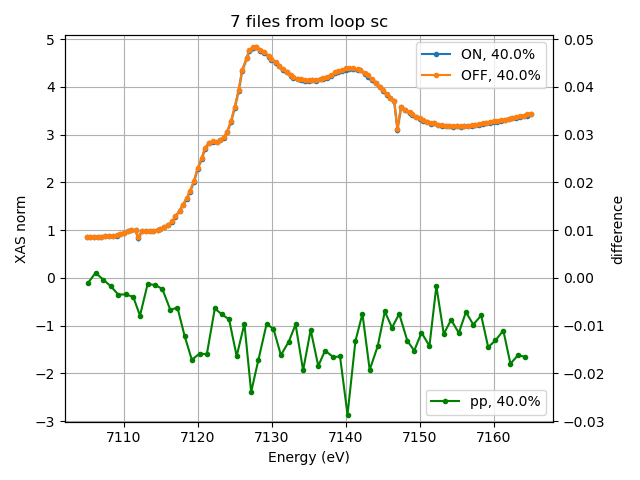

In [81]:
nscans = 7

XAS_pump = np.mean(DataDiode_pump_all[:nscans], axis=0)[:,0]
err_low_pump = np.mean(DataDiode_pump_all[:nscans], axis=0)[:,1]
err_high_pump = np.mean(DataDiode_pump_all[:nscans], axis=0)[:,2]
XAS_unpump = np.mean(DataDiode_unpump_all[:nscans], axis=0)[:,0]
err_low_unpump = np.mean(DataDiode_unpump_all[:nscans], axis=0)[:,1]
err_high_unpump = np.mean(DataDiode_unpump_all[:nscans], axis =0)[:,2]
XAS_pump_probe = np.mean(Pump_probe_all[:nscans], axis=0)[:,0]
err_low_pump_probe = np.mean(Pump_probe_all[:nscans], axis=0)[:,1]
err_high_pump_probe = np.mean(Pump_probe_all[:nscans], axis=0)[:,2]

fig, ax1 = plt.subplots()
# plt.title('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))
plt.title('{} files from loop {}'.format(nscans, json_file.split('/')[-1][:-7]))

ax2 = ax1.twinx()
ax1.plot(Energy_eV, XAS_pump, label='ON, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_pump, err_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_unpump, label='OFF, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_unpump, err_high_unpump, color='navajowhite')

# ax2.plot(Energy_eV, XAS_pump_probe, label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')
ax2.plot(binned(Energy_eV,2), binned(XAS_pump_probe,2), label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax1.legend(loc='best')
ax2.legend(loc='lower right')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS norm')
ax2.set_ylabel('difference')

ratio = 100
ylim1 = ax1.get_ylim()
ylim2 = ax2.get_ylim()
ax1.set_ylim(ylim2[0]*ratio, ylim1[1])
ax2.set_ylim(ylim2[0], ylim1[1]/ratio)

ax1.grid()
plt.tight_layout()
plt.show()

In [67]:
np.shape(DataDiode_pump_all)

(10, 121, 3)

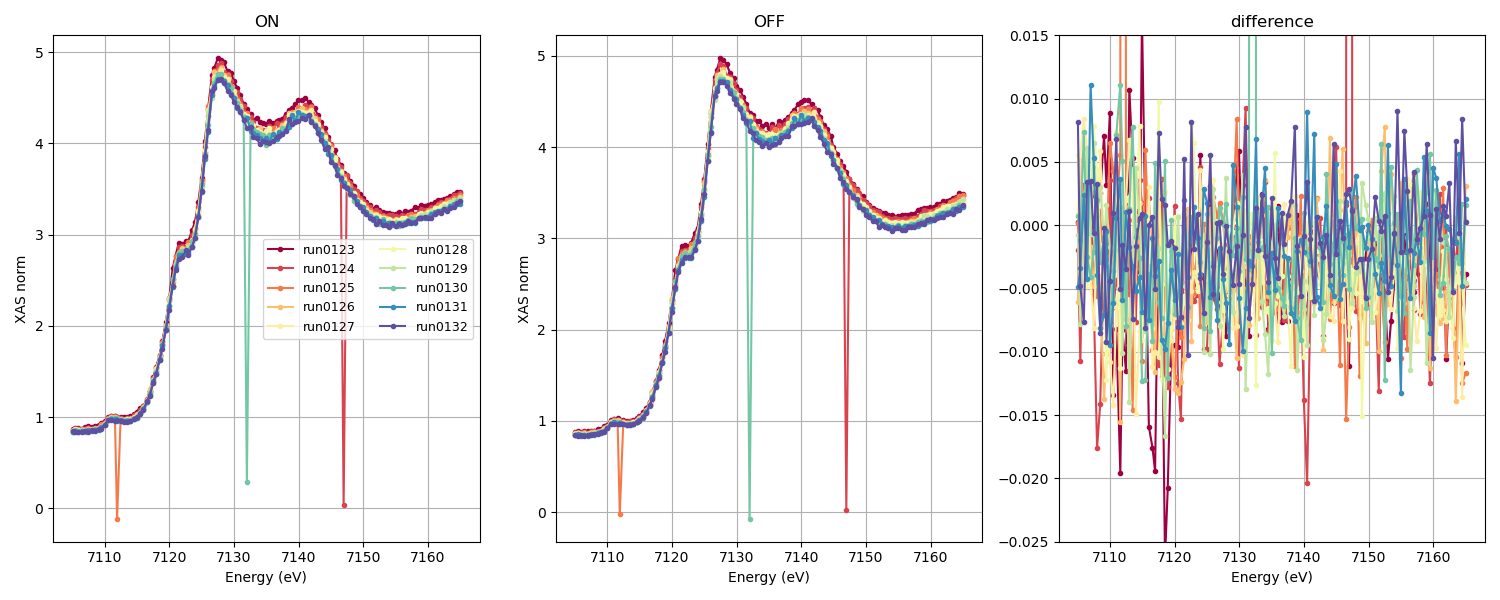

In [66]:
XAS_pump_all = DataDiode_pump_all[:,:,0]
XAS_unpump_all = DataDiode_unpump_all[:,:,0]
XAS_pump_probe_all = Pump_probe_all[:,:,0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
plt.title('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))

for ax in [ax1, ax2, ax3]:
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,10)))
    ax.set_xlabel('Energy (eV)')
    ax.grid()

for i in range(10):
    ax1.plot(Energy_eV, XAS_pump_all[i], label='run{:04d}'.format(123+i),marker='.')
    ax2.plot(Energy_eV, XAS_unpump_all[i], label='run{:04d}'.format(123+i),marker='.')
    ax3.plot(Energy_eV, XAS_pump_probe_all[i]/XAS_pump_all[i], label='pp, {}%'.format(quantile_corr*100),marker='.')

ax1.legend(loc='best', fontsize=9, ncol=2)
# ax2.legend(loc='lower right')

ax1.set_title('ON')
ax2.set_title('OFF')

ax1.set_ylabel('XAS norm')
ax2.set_ylabel('XAS norm')
ax3.set_title('difference')

ax3.set_ylim(-0.025,0.015)

plt.tight_layout()
plt.show()

In [34]:
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_pump_all.npy', DataDiode_pump_all)
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_unpump_all.npy', DataDiode_unpump_all)
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Pump_probe_all.npy', Pump_probe_all)
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Energy_eV.npy', Energy_eV)

In [42]:
DataDiode_pump_2ps_all = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_pump_all.npy')
DataDiode_unpump_2ps_all = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_unpump_all.npy')
Pump_probe_2ps_all = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Pump_probe_all.npy')
Energy_eV_2ps = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Energy_eV.npy')

## cell to export data

In [ ]:
import pandas as pd
DIR_save = "/das/work/p18/p18956/UserFolder/"
file2save = DIR_save + scan_name + ".txt"
pd.DataFrame({
    'Energy_eV' : Energy_eV,
    'pump_probe': Pump_probe,
    'signal_on' : DataFluo_pump,
    'signal_off' : DataFluo_unpump,
}).to_csv(file2save,index=False)